In [34]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Introducing geopandas
In the next two weeks we will use the [geopandas](http://geopandas.org/) package to explore some key challenges of dealing with spatial data in the context of data science. That name probably requires at least a little bit of explanation. [Pandas](http://pandas.pydata.org/index.html) is an advanced package for manipulating tables of data.  The name is an approximate acronym for Python Data Analysis library.  Many of the capabilities pandas offers are available in the datascience package you have been using in foundation class, although pandas more advanced features mean that it is not an especially easy package to learn.

Anyway, geo-pandas combines pandas (data tables) with number of other packages, in particular, shapely (https://pypi.python.org/pypi/Shapely) which deals with geometry and fiona (https://pypi.python.org/pypi/Fiona) which handles spatial data formats.

So... let's import geopandas.

In [35]:
import geopandas as gpd

## Open a data file
This is simple. The `read_file()` function will do the trick, and provided the file format makes sense, and is consistent with the file extension, you should have no issues.

In [36]:
counties = gpd.read_file('data/ca-counties-2010.shp')

Assign the file read result to a suitable variable name, and from there on you are dealing with a geopandas `GeoDataFrame` object, which allows us to examine the contents.  The `.head()` function will show us the first few rows of the data table.

In [37]:
counties.head()

,CENSUSAREA,COUNTY,GEO_ID,Geography,Id,Id2,LSAD,NAME,STATE,geometry,...,nPop,p20to24,pAIAAN,pAfrAmer,pAsian,pFemale,pHispLat,pOther,pU5,pWhite
0,4541.184,035,0500000US06035,"Lassen County, California",0500000US06035,6035.0,County,Lassen,06,"POLYGON ((200.2238382628718 306850.1626539091,...",...,34895.0,8.1,3.5,8.1,1.0,35.8,17.5,10.2,4.7,73.2
1,3917.770,049,0500000US06049,"Modoc County, California",0500000US06049,6049.0,County,Modoc,06,POLYGON ((-40444.04459339473 441660.9794727284...,...,9686.0,4.4,3.8,0.8,0.8,49.6,13.9,7.0,5.6,83.5
2,46.873,075,0500000US06075,"San Francisco County, California",0500000US06075,6075.0,County,San Francisco,06,(POLYGON ((-265237.2095064469 -31089.148008309...,...,805235.0,7.5,0.5,6.1,33.3,49.3,15.1,6.6,4.4,48.5
3,2735.085,083,0500000US06083,"Santa Barbara County, California",0500000US06083,6083.0,County,Santa Barbara,06,(POLYGON ((19494.79993769876 -439965.299401894...,...,423895.0,10.2,1.3,2.0,4.9,49.8,42.9,17.4,6.5,69.6
4,953.214,091,0500000US06091,"Sierra County, California",0500000US06091,6091.0,County,Sierra,06,POLYGON ((-179.3527407914399 158623.8650718099...,...,3240.0,3.6,1.4,0.2,0.4,49.2,8.3,2.3,4.5,93.3


The important thing to notice here, is the **geometry** column in the table. It may not show up in the table view above. Let's take a look at it

In [38]:
counties.geometry.head()

0    POLYGON ((200.2238382628718 306850.1626539091,...
1    POLYGON ((-40444.04459339473 441660.9794727284...
2    (POLYGON ((-265237.2095064469 -31089.148008309...
3    (POLYGON ((19494.79993769876 -439965.299401894...
4    POLYGON ((-179.3527407914399 158623.8650718099...
Name: geometry, dtype: object

We can also use dictionary style notation to access the column.

In [39]:
counties['geometry'].head()

0    POLYGON ((200.2238382628718 306850.1626539091,...
1    POLYGON ((-40444.04459339473 441660.9794727284...
2    (POLYGON ((-265237.2095064469 -31089.148008309...
3    (POLYGON ((19494.79993769876 -439965.299401894...
4    POLYGON ((-179.3527407914399 158623.8650718099...
Name: geometry, dtype: object

What is a geometry? 

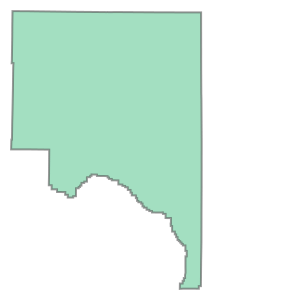

In [7]:
counties.geometry[0]

Cool! You just made a map of Lassen County. Not a particularly useful map, but a map nevertheless.

The geometry column in a `GeoDataFrame` can store points, polygons, line segments or a variety of other `shapely` geometries, which can then be manipulated and managed in various ways according to our needs.

### Let's make some maps!

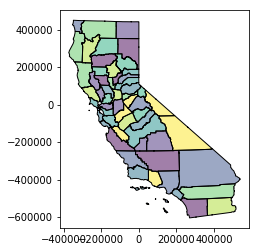

In [8]:
counties.plot()

Kinda small. Try again.

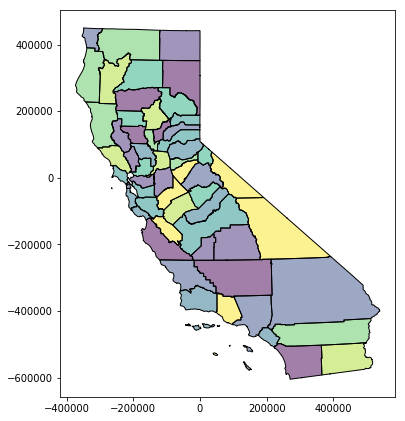

In [9]:
counties.plot(figsize=(6,9))

We can manipulate the look of this with a variety of other options in the `plot()` function. For example...

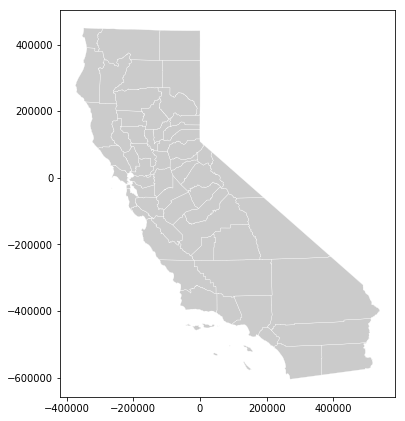

In [10]:
counties.plot(figsize=(6,9), linewidth=0.25, edgecolor='w', facecolor='#999999')

You can find out more about the plotting options for basic maps in geopandas from [the documentation](http://geopandas.org/mapping.html) and also from the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html). 

For closer control over things, you need to a work at a lower level with the pyplot API. For example, to put county names on the map...

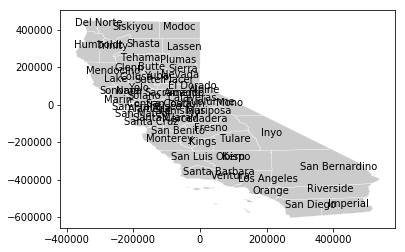

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
for polygon, name in zip(counties.geometry, counties.NAME):
    ax.annotate(xy=(polygon.centroid.x-50000, polygon.centroid.y), s=name)
counties.plot(ax=ax, linewidth=0.25, edgecolor='w', facecolor='#999999')

Hmmm... something not quite right there. The problem is that by working with the **matplotlib** low-level API, the plotting is no longer aware that the $(x, y)$ coordinates of the geometries are not just any old $(x, y)$ coordinates, but meaningful ones that need to be treated as such.  In particular, in most cases, they should be treated as scaled equally (in this case they are meters, from an arbitrary origin).  We enforce this by specifying that the plot should employ an equal aspect ratio.

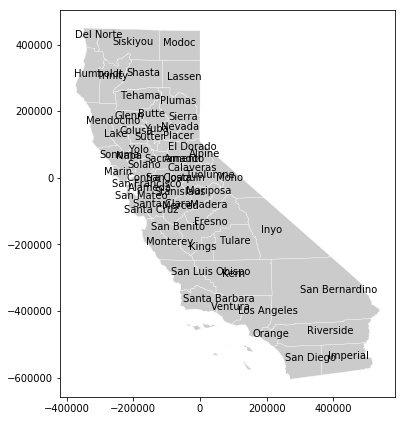

In [12]:
fig = plt.figure(figsize=(6,9))
ax = fig.add_subplot(111)
# Apply equal aspect ratio
ax.set_aspect('equal')
for polygon, name in zip(counties.geometry, counties.NAME):
    ax.annotate(xy=(polygon.centroid.x-50000, polygon.centroid.y), s=name)
counties.plot(ax=ax, linewidth=0.25, edgecolor='w', facecolor='#999999')

That's still not perfect, but it is a big improvement.

It is possible to make nice maps in geopandas, but to make finished publication quality maps, you will most likely want to export the map to a graphical file format for final tidy up in a package such as Inkscape or Illustrator. We aren't particularly concerned at the moment with publication quality maps so I'll just note the possibility and move on.

In [40]:
## For example, you could do this, to make an SVG file
## fig.savefig('ca.svg')

## Mapping data
Our concern here is with *data* as much as with maps, so how can we map the data in that table we saw above?

We simply tell the `plot()` function what column in the data table to map.  Let's work initially with the `nPop` column which tells us the number of people recorded in the census in each county.

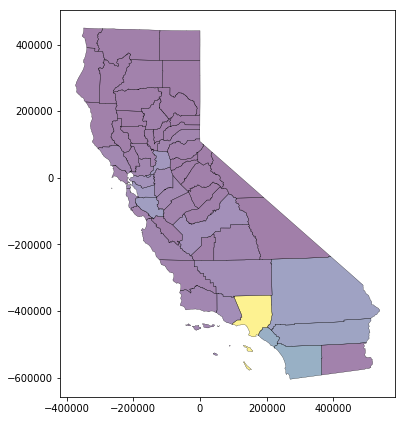

In [14]:
counties.plot(column='nPop', linewidth=0.25, figsize=(6,9))

Not great. The problem here is the color scheme we are using (the default). Try this instead.

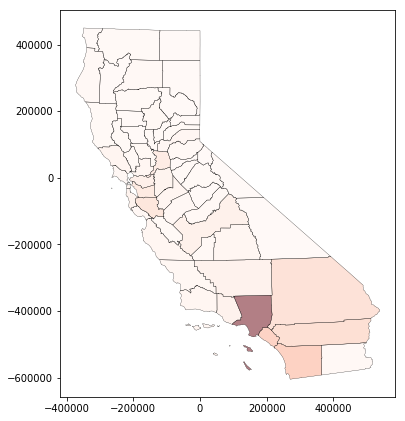

In [19]:
counties.plot(column='nPop', cmap='Reds', linewidth=0.25, figsize=(6,9))

Hmmm. What's the problem now? It turns out counties are bad units for many kinds of analysis because they have radically different populations. We can see this by making a histogram of the county populations. 

(array([ 49.,   4.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.17500000e+03,   9.82918000e+05,   1.96466100e+06,
          2.94640400e+06,   3.92814700e+06,   4.90989000e+06,
          5.89163300e+06,   6.87337600e+06,   7.85511900e+06,
          8.83686200e+06,   9.81860500e+06]),
 <a list of 10 Patch objects>)

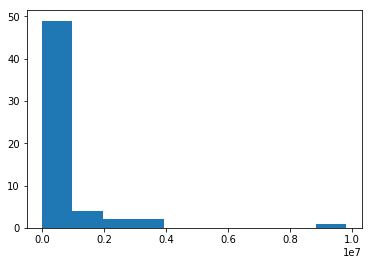

In [25]:
plt.hist(counties.nPop)

There are 53 counties in the state. 49 of them have populations under 1 million (well under that in fact), while Los Angeles county has over 9 million. That very skew distribution means we have to think carefully about how to map such data in a meaningful way. 

Take a look at the code below.

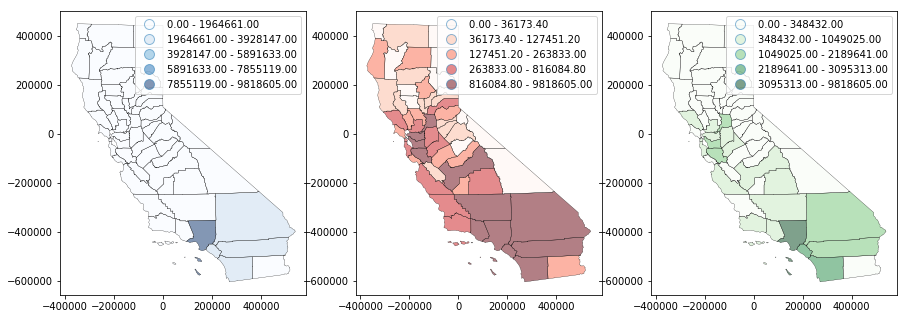

In [60]:
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(131)
ax1.set_aspect('equal')
counties.plot(ax=ax1, column='nPop', cmap='Blues', scheme='equal_interval', linewidth=0.25, legend=True)
ax2 = plt.subplot(132)
ax2.set_aspect('equal')
counties.plot(ax=ax2, column='nPop', cmap='Reds', scheme='quantiles', linewidth=0.25, legend=True)
ax3 = plt.subplot(133)
ax3.set_aspect('equal')
counties.plot(ax=ax3, column='nPop', cmap='Greens', scheme='fisher_jenks', linewidth=0.25, legend=True)

This makes three maps, each of them using a different *classification scheme* to determine how data values are mapped onto colors for display.  This is something you will look at in more detail later in the course, and it can have dramatic effects on the message conveyed by a map.

For now, in the cell below, experiment with making some maps of other columns in the data table.  Experiment with the `edgecolor`, `linewidth` and `facecolor` options.  Also change the color map `cmap` setting.  A list of the available color maps is [provided here](http://matplotlib.org/users/colormaps.html).

## Quicker plotting
You may have noticed that when we make three maps of California, GeoPandas `plot()` function gets quite slow.  There are technical reasons for this and a fix is in the pipeline for a future release of the package.  For now, I've made a hacky fix, that will allow you to plot things more quickly, but which might break (you have been warned).

It also can't produce legends or provide alternative classification schemes.

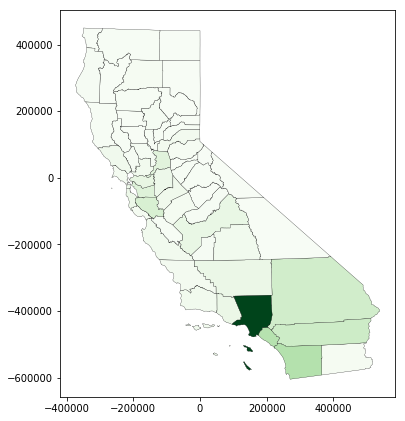

In [51]:
import quickplot as qp

fig = plt.figure(figsize=(6,9))
qp.quickplot(counties, column='nPop', cmap='Greens', linewidth=0.25, edgecolor='k')

Note that key capabilities of geopandas `plot()` are not available in my hacky `quickplot()`, specifically `scheme` and `legend`.  That's not ideal, but at least when you are experimenting with code you can get maps more quickly with this approach.  This is important when we look at larger datasets like all the counties for the wholeof the US.

## Making a web map
Finally in this quick introduction, if you'd like to take a map from geopandas and make it into a web map, we can do that with a package called `mplleaflet`.

In [61]:
import mplleaflet as mpl

qp.quickplot(counties.to_crs(epsg=4236), column='pWhite', cmap='Reds', edgecolor='k')
mpl.display()

There is a sneaky function call `to_crs()` in that code snippet, which relates to map projections. We'll look at that in more detail in the next session.